In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scorecardpy as sc
import seaborn as sns
from sklearn.metrics import classification_report

### Load the data

In [2]:
data = pd.read_csv('mortgage_sample.csv', sep=',')
data.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,sample
0,1,25,-7,25,113,41303.42,24.498336,9.2,226.29,2.899137,...,0,45000.0,715,69.4,9.2,87.03,0.0,0.0,0.0,public
1,1,26,-7,25,113,41061.95,24.483867,9.2,225.10,2.151365,...,0,45000.0,715,69.4,9.2,87.03,0.0,0.0,0.0,public
2,1,27,-7,25,113,40804.42,24.626795,9.2,222.39,2.361722,...,0,45000.0,715,69.4,9.2,87.03,0.0,0.0,0.0,public
3,1,28,-7,25,113,40483.89,24.735883,9.2,219.67,1.229172,...,0,45000.0,715,69.4,9.2,87.03,0.0,0.0,0.0,public
4,1,29,-7,25,113,40367.06,24.925476,9.2,217.37,1.692969,...,0,45000.0,715,69.4,9.2,87.03,0.0,0.0,0.0,public


In [3]:
data.shape

(622489, 24)

In [4]:
data.tail()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,sample
622484,50000,56,16,52,177,517107.42,57.659403,2.664,181.43,1.717053,...,0,664000.0,653,80.0,1.75,167.91,NaN,NaN,NaN,private
622485,50000,57,16,52,177,512274.57,55.359916,2.652,187.20,2.556052,...,0,664000.0,653,80.0,1.75,167.91,NaN,NaN,NaN,private
622486,50000,58,16,52,177,507396.72,54.492206,2.644,188.37,2.868594,...,0,664000.0,653,80.0,1.75,167.91,NaN,NaN,NaN,private
622487,50000,59,16,52,177,502478.87,54.171106,2.638,187.65,2.443648,...,0,664000.0,653,80.0,1.75,167.91,NaN,NaN,NaN,private
622488,50000,60,16,52,177,497521.35,53.023479,2.635,189.82,2.836358,...,0,664000.0,653,80.0,1.75,167.91,NaN,NaN,NaN,private


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622489 entries, 0 to 622488
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       622489 non-null  int64  
 1   time                     622489 non-null  int64  
 2   orig_time                622489 non-null  int64  
 3   first_time               622489 non-null  int64  
 4   mat_time                 622489 non-null  int64  
 5   balance_time             622489 non-null  float64
 6   LTV_time                 622219 non-null  float64
 7   interest_rate_time       622489 non-null  float64
 8   hpi_time                 622489 non-null  float64
 9   gdp_time                 622489 non-null  float64
 10  uer_time                 622489 non-null  float64
 11  REtype_CO_orig_time      622489 non-null  int64  
 12  REtype_PU_orig_time      622489 non-null  int64  
 13  REtype_SF_orig_time      622489 non-null  int64  
 14  inve

In [6]:
data.columns

Index(['id', 'time', 'orig_time', 'first_time', 'mat_time', 'balance_time',
       'LTV_time', 'interest_rate_time', 'hpi_time', 'gdp_time', 'uer_time',
       'REtype_CO_orig_time', 'REtype_PU_orig_time', 'REtype_SF_orig_time',
       'investor_orig_time', 'balance_orig_time', 'FICO_orig_time',
       'LTV_orig_time', 'Interest_Rate_orig_time', 'hpi_orig_time',
       'default_time', 'payoff_time', 'status_time', 'sample'],
      dtype='object')

### Data preprocessing

In [7]:
data['sample'].value_counts()

public     561164
private     61325
Name: sample, dtype: int64

In [8]:
data['default_time'].value_counts()

0.0    547540
1.0     13624
Name: default_time, dtype: int64

In [9]:
new_data = data.loc[data['sample'] == "public"]
new_data

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,sample
0,1,25,-7,25,113,41303.42,24.498336,9.200,226.29,2.899137,...,0,45000.0,715,69.4,9.20,87.03,0.0,0.0,0.0,public
1,1,26,-7,25,113,41061.95,24.483867,9.200,225.10,2.151365,...,0,45000.0,715,69.4,9.20,87.03,0.0,0.0,0.0,public
2,1,27,-7,25,113,40804.42,24.626795,9.200,222.39,2.361722,...,0,45000.0,715,69.4,9.20,87.03,0.0,0.0,0.0,public
3,1,28,-7,25,113,40483.89,24.735883,9.200,219.67,1.229172,...,0,45000.0,715,69.4,9.20,87.03,0.0,0.0,0.0,public
4,1,29,-7,25,113,40367.06,24.925476,9.200,217.37,1.692969,...,0,45000.0,715,69.4,9.20,87.03,0.0,0.0,0.0,public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622475,49999,56,17,52,177,265013.60,45.586335,2.774,181.43,1.717053,...,0,345000.0,779,60.0,1.75,179.45,0.0,0.0,0.0,public
622476,49999,57,17,52,177,263608.64,43.947018,2.762,187.20,2.556052,...,0,345000.0,779,60.0,1.75,179.45,0.0,0.0,0.0,public
622477,49999,58,17,52,177,262187.35,43.438579,2.754,188.37,2.868594,...,0,345000.0,779,60.0,1.75,179.45,0.0,0.0,0.0,public
622478,49999,59,17,52,177,260775.05,43.370366,2.748,187.65,2.443648,...,0,345000.0,779,60.0,1.75,179.45,0.0,0.0,0.0,public


In [10]:
# take only public values
new_data['sample'].value_counts()

public    561164
Name: sample, dtype: int64

In [11]:
new_data = new_data.reset_index(drop=True)
new_data

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,sample
0,1,25,-7,25,113,41303.42,24.498336,9.200,226.29,2.899137,...,0,45000.0,715,69.4,9.20,87.03,0.0,0.0,0.0,public
1,1,26,-7,25,113,41061.95,24.483867,9.200,225.10,2.151365,...,0,45000.0,715,69.4,9.20,87.03,0.0,0.0,0.0,public
2,1,27,-7,25,113,40804.42,24.626795,9.200,222.39,2.361722,...,0,45000.0,715,69.4,9.20,87.03,0.0,0.0,0.0,public
3,1,28,-7,25,113,40483.89,24.735883,9.200,219.67,1.229172,...,0,45000.0,715,69.4,9.20,87.03,0.0,0.0,0.0,public
4,1,29,-7,25,113,40367.06,24.925476,9.200,217.37,1.692969,...,0,45000.0,715,69.4,9.20,87.03,0.0,0.0,0.0,public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561159,49999,56,17,52,177,265013.60,45.586335,2.774,181.43,1.717053,...,0,345000.0,779,60.0,1.75,179.45,0.0,0.0,0.0,public
561160,49999,57,17,52,177,263608.64,43.947018,2.762,187.20,2.556052,...,0,345000.0,779,60.0,1.75,179.45,0.0,0.0,0.0,public
561161,49999,58,17,52,177,262187.35,43.438579,2.754,188.37,2.868594,...,0,345000.0,779,60.0,1.75,179.45,0.0,0.0,0.0,public
561162,49999,59,17,52,177,260775.05,43.370366,2.748,187.65,2.443648,...,0,345000.0,779,60.0,1.75,179.45,0.0,0.0,0.0,public


#### duplicated values

In [12]:
new_data[new_data.duplicated()]

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,sample
414500,36710,51,16,18,76,48308.18,45.260111,5.500,158.6,1.269044,...,1,90400.0,694,80.0,5.500,167.91,0.0,0.0,0.0,public
414545,36713,51,21,23,141,233322.59,80.833546,6.250,158.6,1.269044,...,0,260000.0,630,68.4,6.250,208.86,0.0,0.0,0.0,public
414589,36714,51,15,18,75,35881.19,37.996774,5.250,158.6,1.269044,...,0,70000.0,695,72.9,5.250,161.27,0.0,0.0,0.0,public
414817,36730,51,17,20,77,121838.84,27.037586,4.750,158.6,1.269044,...,0,310000.0,737,60.8,4.750,179.45,0.0,0.0,0.0,public
414880,36733,51,10,13,131,70169.20,46.090939,6.875,158.6,1.269044,...,1,81700.0,783,61.4,6.875,138.62,0.0,0.0,0.0,public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434209,37847,51,17,19,77,59763.60,27.056812,4.750,158.6,1.269044,...,1,174194.0,736,69.7,4.750,179.45,0.0,0.0,0.0,public
434252,37848,51,17,19,138,115903.43,69.021273,5.750,158.6,1.269044,...,1,133000.0,786,70.0,5.750,179.45,0.0,0.0,0.0,public
434310,37851,51,17,19,78,35450.50,46.104508,5.460,158.6,1.269044,...,1,65250.0,801,75.0,5.460,179.45,0.0,0.0,0.0,public
434347,37852,51,22,25,143,354145.12,65.411389,6.460,158.6,1.269044,...,0,554250.0,716,74.9,6.460,216.77,0.0,0.0,0.0,public


In [13]:
# recheck manually
new_data.loc[new_data['id'] == 36710]

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,sample
414466,36710,18,16,18,76,89749.88,71.350900,5.5,186.91,3.370511,...,1,90400.0,694,80.0,5.5,167.91,0.0,0.0,0.0,public
414467,36710,19,16,18,76,88431.66,68.646529,5.5,191.42,3.069483,...,1,90400.0,694,80.0,5.5,167.91,0.0,0.0,0.0,public
414468,36710,20,16,18,76,87427.05,65.212794,5.5,199.21,3.556335,...,1,90400.0,694,80.0,5.5,167.91,0.0,0.0,0.0,public
414469,36710,21,16,18,76,86408.57,61.475159,5.5,208.86,3.346929,...,1,90400.0,694,80.0,5.5,167.91,0.0,0.0,0.0,public
414470,36710,22,16,18,76,85376.02,58.524114,5.5,216.77,3.278796,...,1,90400.0,694,80.0,5.5,167.91,0.0,0.0,0.0,public
414471,36710,23,16,18,76,84329.21,56.467593,5.5,221.91,2.987109,...,1,90400.0,694,80.0,5.5,167.91,0.0,0.0,0.0,public
414472,36710,24,16,18,76,83267.93,55.298435,5.5,223.75,3.121195,...,1,90400.0,694,80.0,5.5,167.91,0.0,0.0,0.0,public
414473,36710,25,16,18,76,82191.99,53.971222,5.5,226.29,2.899137,...,1,90400.0,694,80.0,5.5,167.91,0.0,0.0,0.0,public
414474,36710,26,16,18,76,81101.19,53.536485,5.5,225.10,2.151365,...,1,90400.0,694,80.0,5.5,167.91,0.0,0.0,0.0,public
414475,36710,27,16,18,76,79995.32,53.449967,5.5,222.39,2.361722,...,1,90400.0,694,80.0,5.5,167.91,0.0,0.0,0.0,public


In [14]:
new_data.iloc[414499,].values.tolist()

[36710,
 51,
 16,
 18,
 76,
 48308.18,
 45.260110613,
 5.5,
 158.6,
 1.2690442628,
 7.8,
 0,
 0,
 1,
 1,
 90400.0,
 694,
 80.0,
 5.5,
 167.91,
 0.0,
 0.0,
 0.0,
 'public']

In [15]:
new_data.iloc[414500,].values.tolist()

[36710,
 51,
 16,
 18,
 76,
 48308.18,
 45.260110613,
 5.5,
 158.6,
 1.2690442628,
 7.8,
 0,
 0,
 1,
 1,
 90400.0,
 694,
 80.0,
 5.5,
 167.91,
 0.0,
 0.0,
 0.0,
 'public']

some duplicated rows in a dataset

In [16]:
new_data.shape

(561164, 24)

In [17]:
new_data = new_data.drop_duplicates()

In [18]:
new_data.shape

(560888, 24)

In [19]:
new_data[new_data.duplicated()]

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,sample


In [20]:
new_data.tail()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,sample
561159,49999,56,17,52,177,265013.60,45.586335,2.774,181.43,1.717053,...,0,345000.0,779,60.0,1.75,179.45,0.0,0.0,0.0,public
561160,49999,57,17,52,177,263608.64,43.947018,2.762,187.20,2.556052,...,0,345000.0,779,60.0,1.75,179.45,0.0,0.0,0.0,public
561161,49999,58,17,52,177,262187.35,43.438579,2.754,188.37,2.868594,...,0,345000.0,779,60.0,1.75,179.45,0.0,0.0,0.0,public
561162,49999,59,17,52,177,260775.05,43.370366,2.748,187.65,2.443648,...,0,345000.0,779,60.0,1.75,179.45,0.0,0.0,0.0,public
561163,49999,60,17,52,177,259349.31,42.640152,2.745,189.82,2.836358,...,0,345000.0,779,60.0,1.75,179.45,0.0,0.0,0.0,public


In [21]:
new_data = new_data.reset_index(drop=True)

In [22]:
new_data

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,sample
0,1,25,-7,25,113,41303.42,24.498336,9.200,226.29,2.899137,...,0,45000.0,715,69.4,9.20,87.03,0.0,0.0,0.0,public
1,1,26,-7,25,113,41061.95,24.483867,9.200,225.10,2.151365,...,0,45000.0,715,69.4,9.20,87.03,0.0,0.0,0.0,public
2,1,27,-7,25,113,40804.42,24.626795,9.200,222.39,2.361722,...,0,45000.0,715,69.4,9.20,87.03,0.0,0.0,0.0,public
3,1,28,-7,25,113,40483.89,24.735883,9.200,219.67,1.229172,...,0,45000.0,715,69.4,9.20,87.03,0.0,0.0,0.0,public
4,1,29,-7,25,113,40367.06,24.925476,9.200,217.37,1.692969,...,0,45000.0,715,69.4,9.20,87.03,0.0,0.0,0.0,public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560883,49999,56,17,52,177,265013.60,45.586335,2.774,181.43,1.717053,...,0,345000.0,779,60.0,1.75,179.45,0.0,0.0,0.0,public
560884,49999,57,17,52,177,263608.64,43.947018,2.762,187.20,2.556052,...,0,345000.0,779,60.0,1.75,179.45,0.0,0.0,0.0,public
560885,49999,58,17,52,177,262187.35,43.438579,2.754,188.37,2.868594,...,0,345000.0,779,60.0,1.75,179.45,0.0,0.0,0.0,public
560886,49999,59,17,52,177,260775.05,43.370366,2.748,187.65,2.443648,...,0,345000.0,779,60.0,1.75,179.45,0.0,0.0,0.0,public


all duplicated rows were removed

#### missing values

In [23]:
# init_data[init_data['id'].isnull()]
new_data.isnull().values.any()

True

In [24]:
new_data[new_data.isna().any(axis=1)]

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,sample
460059,39723,25,7,25,127,36511.42,NaN,9.375,226.29,2.899137,...,0,0.0,630,70.0,0.0,123.64,0.0,0.0,0.0,public
460060,39723,26,7,25,127,36429.18,NaN,10.250,225.10,2.151365,...,0,0.0,630,70.0,0.0,123.64,0.0,0.0,0.0,public
460061,39723,27,7,25,127,36353.16,NaN,10.250,222.39,2.361722,...,0,0.0,630,70.0,0.0,123.64,0.0,0.0,0.0,public
460062,39723,28,7,25,127,36277.35,NaN,10.750,219.67,1.229172,...,0,0.0,630,70.0,0.0,123.64,0.0,0.0,0.0,public
460063,39723,29,7,25,127,36203.90,NaN,10.750,217.37,1.692969,...,0,0.0,630,70.0,0.0,123.64,0.0,0.0,0.0,public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558468,49658,56,-8,52,112,33090.22,NaN,8.875,181.43,1.717053,...,0,0.0,573,70.0,0.0,83.87,0.0,0.0,0.0,public
558469,49658,57,-8,52,112,32603.53,NaN,8.875,187.20,2.556052,...,0,0.0,573,70.0,0.0,83.87,0.0,0.0,0.0,public
558470,49658,58,-8,52,112,32603.53,NaN,8.875,188.37,2.868594,...,0,0.0,573,70.0,0.0,83.87,0.0,0.0,0.0,public
558471,49658,59,-8,52,112,32098.56,NaN,8.875,187.65,2.443648,...,0,0.0,573,70.0,0.0,83.87,0.0,0.0,0.0,public


In [25]:
new_data.isna().any()

id                         False
time                       False
orig_time                  False
first_time                 False
mat_time                   False
balance_time               False
LTV_time                    True
interest_rate_time         False
hpi_time                   False
gdp_time                   False
uer_time                   False
REtype_CO_orig_time        False
REtype_PU_orig_time        False
REtype_SF_orig_time        False
investor_orig_time         False
balance_orig_time          False
FICO_orig_time             False
LTV_orig_time              False
Interest_Rate_orig_time    False
hpi_orig_time              False
default_time               False
payoff_time                False
status_time                False
sample                     False
dtype: bool

In [26]:
len(new_data[new_data['LTV_time'].isnull()])

173

In [27]:
new_data[new_data['LTV_time'].isnull()]

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,sample
460059,39723,25,7,25,127,36511.42,NaN,9.375,226.29,2.899137,...,0,0.0,630,70.0,0.0,123.64,0.0,0.0,0.0,public
460060,39723,26,7,25,127,36429.18,NaN,10.250,225.10,2.151365,...,0,0.0,630,70.0,0.0,123.64,0.0,0.0,0.0,public
460061,39723,27,7,25,127,36353.16,NaN,10.250,222.39,2.361722,...,0,0.0,630,70.0,0.0,123.64,0.0,0.0,0.0,public
460062,39723,28,7,25,127,36277.35,NaN,10.750,219.67,1.229172,...,0,0.0,630,70.0,0.0,123.64,0.0,0.0,0.0,public
460063,39723,29,7,25,127,36203.90,NaN,10.750,217.37,1.692969,...,0,0.0,630,70.0,0.0,123.64,0.0,0.0,0.0,public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558468,49658,56,-8,52,112,33090.22,NaN,8.875,181.43,1.717053,...,0,0.0,573,70.0,0.0,83.87,0.0,0.0,0.0,public
558469,49658,57,-8,52,112,32603.53,NaN,8.875,187.20,2.556052,...,0,0.0,573,70.0,0.0,83.87,0.0,0.0,0.0,public
558470,49658,58,-8,52,112,32603.53,NaN,8.875,188.37,2.868594,...,0,0.0,573,70.0,0.0,83.87,0.0,0.0,0.0,public
558471,49658,59,-8,52,112,32098.56,NaN,8.875,187.65,2.443648,...,0,0.0,573,70.0,0.0,83.87,0.0,0.0,0.0,public


In [28]:
data_clean = new_data[new_data['LTV_time'].notna()]
data_clean.shape

(560715, 24)

In [29]:
data_clean.isna().any()

id                         False
time                       False
orig_time                  False
first_time                 False
mat_time                   False
balance_time               False
LTV_time                   False
interest_rate_time         False
hpi_time                   False
gdp_time                   False
uer_time                   False
REtype_CO_orig_time        False
REtype_PU_orig_time        False
REtype_SF_orig_time        False
investor_orig_time         False
balance_orig_time          False
FICO_orig_time             False
LTV_orig_time              False
Interest_Rate_orig_time    False
hpi_orig_time              False
default_time               False
payoff_time                False
status_time                False
sample                     False
dtype: bool

In [30]:
data_clean = data_clean.reset_index(drop=True)

In [31]:
data_clean

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,sample
0,1,25,-7,25,113,41303.42,24.498336,9.200,226.29,2.899137,...,0,45000.0,715,69.4,9.20,87.03,0.0,0.0,0.0,public
1,1,26,-7,25,113,41061.95,24.483867,9.200,225.10,2.151365,...,0,45000.0,715,69.4,9.20,87.03,0.0,0.0,0.0,public
2,1,27,-7,25,113,40804.42,24.626795,9.200,222.39,2.361722,...,0,45000.0,715,69.4,9.20,87.03,0.0,0.0,0.0,public
3,1,28,-7,25,113,40483.89,24.735883,9.200,219.67,1.229172,...,0,45000.0,715,69.4,9.20,87.03,0.0,0.0,0.0,public
4,1,29,-7,25,113,40367.06,24.925476,9.200,217.37,1.692969,...,0,45000.0,715,69.4,9.20,87.03,0.0,0.0,0.0,public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560710,49999,56,17,52,177,265013.60,45.586335,2.774,181.43,1.717053,...,0,345000.0,779,60.0,1.75,179.45,0.0,0.0,0.0,public
560711,49999,57,17,52,177,263608.64,43.947018,2.762,187.20,2.556052,...,0,345000.0,779,60.0,1.75,179.45,0.0,0.0,0.0,public
560712,49999,58,17,52,177,262187.35,43.438579,2.754,188.37,2.868594,...,0,345000.0,779,60.0,1.75,179.45,0.0,0.0,0.0,public
560713,49999,59,17,52,177,260775.05,43.370366,2.748,187.65,2.443648,...,0,345000.0,779,60.0,1.75,179.45,0.0,0.0,0.0,public


all missing values were removed

#### data types

In [32]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560715 entries, 0 to 560714
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       560715 non-null  int64  
 1   time                     560715 non-null  int64  
 2   orig_time                560715 non-null  int64  
 3   first_time               560715 non-null  int64  
 4   mat_time                 560715 non-null  int64  
 5   balance_time             560715 non-null  float64
 6   LTV_time                 560715 non-null  float64
 7   interest_rate_time       560715 non-null  float64
 8   hpi_time                 560715 non-null  float64
 9   gdp_time                 560715 non-null  float64
 10  uer_time                 560715 non-null  float64
 11  REtype_CO_orig_time      560715 non-null  int64  
 12  REtype_PU_orig_time      560715 non-null  int64  
 13  REtype_SF_orig_time      560715 non-null  int64  
 14  inve

default_time, payoff_time, status_time -> float type, but should be int

In [33]:
data_clean['default_time'].value_counts()

0.0    547099
1.0     13616
Name: default_time, dtype: int64

In [34]:
data_clean['payoff_time'].value_counts()

0.0    536775
1.0     23940
Name: payoff_time, dtype: int64

In [35]:
data_clean['status_time'].value_counts()

0.0    523159
2.0     23940
1.0     13616
Name: status_time, dtype: int64

In [36]:
data_clean['default_time'] = data_clean['default_time'].apply(np.int64)
data_clean['default_time']

0         0
1         0
2         0
3         0
4         0
         ..
560710    0
560711    0
560712    0
560713    0
560714    0
Name: default_time, Length: 560715, dtype: int64

In [37]:
data_clean['payoff_time'] = data_clean['payoff_time'].apply(np.int64)
data_clean['payoff_time']

0         0
1         0
2         0
3         0
4         0
         ..
560710    0
560711    0
560712    0
560713    0
560714    0
Name: payoff_time, Length: 560715, dtype: int64

In [38]:
data_clean['status_time'] = data_clean['status_time'].apply(np.int64)
data_clean['status_time']

0         0
1         0
2         0
3         0
4         0
         ..
560710    0
560711    0
560712    0
560713    0
560714    0
Name: status_time, Length: 560715, dtype: int64

In [39]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560715 entries, 0 to 560714
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       560715 non-null  int64  
 1   time                     560715 non-null  int64  
 2   orig_time                560715 non-null  int64  
 3   first_time               560715 non-null  int64  
 4   mat_time                 560715 non-null  int64  
 5   balance_time             560715 non-null  float64
 6   LTV_time                 560715 non-null  float64
 7   interest_rate_time       560715 non-null  float64
 8   hpi_time                 560715 non-null  float64
 9   gdp_time                 560715 non-null  float64
 10  uer_time                 560715 non-null  float64
 11  REtype_CO_orig_time      560715 non-null  int64  
 12  REtype_PU_orig_time      560715 non-null  int64  
 13  REtype_SF_orig_time      560715 non-null  int64  
 14  inve

#### describe dataset

In [40]:
data_clean.shape

(560715, 24)

In [41]:
# round values by 3 decimal
float_list = ["balance_time", "LTV_time", "interest_rate_time", "hpi_time", "gdp_time", "uer_time", "balance_orig_time", 
              "LTV_orig_time", "Interest_Rate_orig_time", "hpi_orig_time"]
for i in float_list:
    data_clean[i] = data_clean[i].apply(lambda x: round(x, 3))

In [42]:
# Dataset description
description = pd.DataFrame(columns=['Min','Max','Mean','Std','Skewness','Kurtosis'])
desc_df = data_clean.iloc[:, 1:23]

description["Min"] = desc_df.min(axis=0)
description["Max"] = desc_df.max(axis=0)
description["Mean"] = desc_df.mean(axis=0)
description["Std"] = desc_df.std(axis=0)
description["Skewness"] = desc_df.skew(axis=0)
description["Kurtosis"] = desc_df.kurtosis(axis=0)
description

,Min,Max,Mean,Std,Skewness,Kurtosis
time,1.000,60.000,35.800230,11.571661,0.225527,-0.455383
orig_time,-40.000,60.000,20.577299,7.587944,-1.913143,9.828253
first_time,1.000,60.000,24.604444,6.734735,0.900875,6.081683
mat_time,20.000,229.000,137.281296,19.408117,-1.924086,6.732515
balance_time,0.000,8701859.240,246134.500400,213038.490445,4.251709,83.222487
LTV_time,0.000,803.514,83.082716,24.863455,0.744986,22.383239
interest_rate_time,0.000,37.500,6.695098,2.071976,0.316017,3.666475
hpi_time,107.830,226.290,184.120957,27.637114,0.140713,-1.291532
gdp_time,-4.147,5.132,1.381115,1.965456,-1.545580,1.609011
uer_time,3.800,10.000,6.517909,1.921740,0.516334,-1.311954


we can see  the  data  are  asymmetrical,  most of cases have offsetting  to  the  right (skewness coefficient equals to zero in case of symmetrical data)

#### outlier treatment

In [43]:
desc_df = desc_df.iloc[:, :19]
desc_df = desc_df.drop(['REtype_CO_orig_time', 'REtype_PU_orig_time', 'REtype_SF_orig_time', 'investor_orig_time'], axis=1)

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


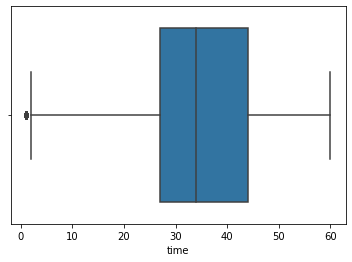

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


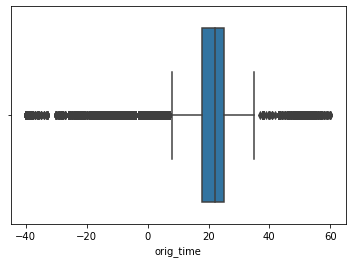

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


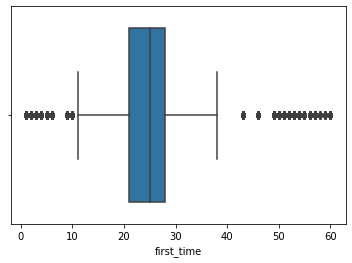

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


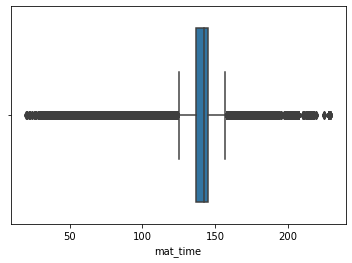

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


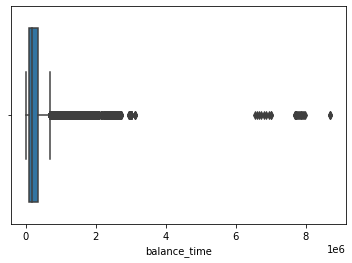

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


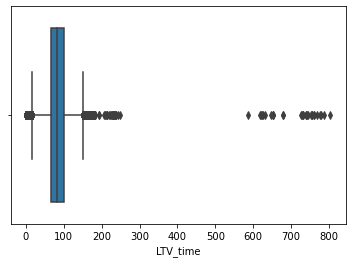

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


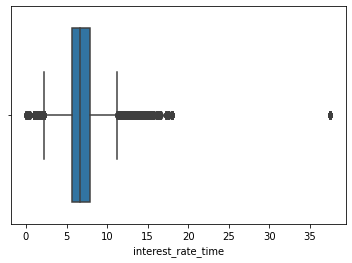

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


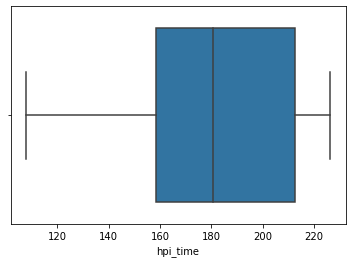

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


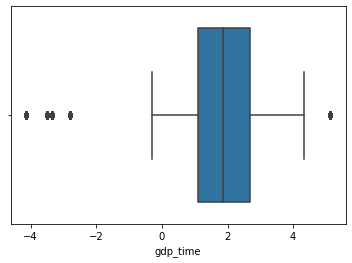

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


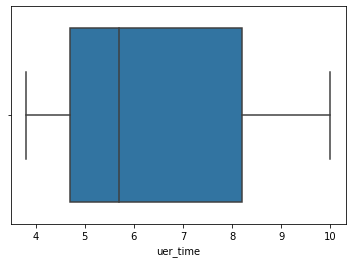

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


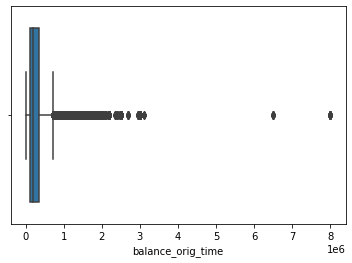

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


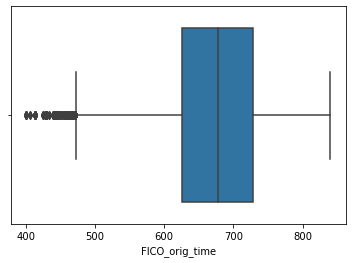

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


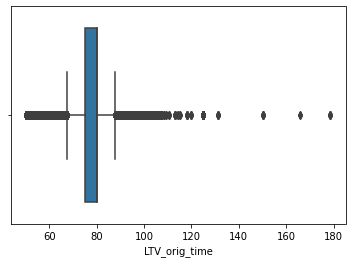

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


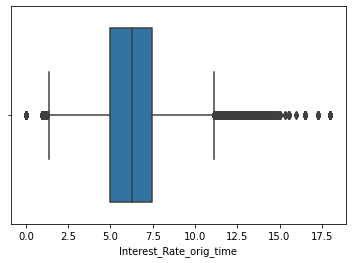

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


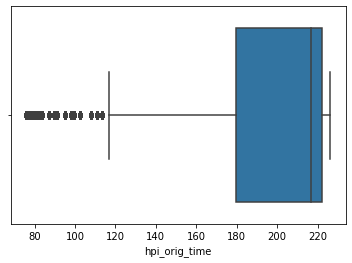

In [44]:
for i in desc_df.columns:
    sns.boxplot(data_clean[i])
    plt.show()

In [45]:
# IQR method

In [46]:
desc_df.columns

Index(['time', 'orig_time', 'first_time', 'mat_time', 'balance_time',
       'LTV_time', 'interest_rate_time', 'hpi_time', 'gdp_time', 'uer_time',
       'balance_orig_time', 'FICO_orig_time', 'LTV_orig_time',
       'Interest_Rate_orig_time', 'hpi_orig_time'],
      dtype='object')

In [47]:
Q1 = desc_df.quantile(0.25)
Q3 = desc_df.quantile(0.75)
IQR = Q3 - Q1
l_limit = Q1 - (1.5 * IQR)
u_limit = Q3 + (1.5 * IQR)

In [48]:
# Algorithm for removing outliers
a = desc_df.copy()
for i, j, z in zip(a, l_limit, u_limit):
    if j == z:
        a = a[a[i] == z]
    else:
        a = a[(a[i] > j) & (a[i] < z)]

In [49]:
a.shape

(226647, 15)

so, we will keep outliers in our dataset, because a lot of information were removed with outliers

In [50]:
data_clean.shape

(560715, 24)

### Data visualization

In [51]:
data_clean

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,sample
0,1,25,-7,25,113,41303.42,24.498,9.200,226.29,2.899,...,0,45000.0,715,69.4,9.20,87.03,0,0,0,public
1,1,26,-7,25,113,41061.95,24.484,9.200,225.10,2.151,...,0,45000.0,715,69.4,9.20,87.03,0,0,0,public
2,1,27,-7,25,113,40804.42,24.627,9.200,222.39,2.362,...,0,45000.0,715,69.4,9.20,87.03,0,0,0,public
3,1,28,-7,25,113,40483.89,24.736,9.200,219.67,1.229,...,0,45000.0,715,69.4,9.20,87.03,0,0,0,public
4,1,29,-7,25,113,40367.06,24.925,9.200,217.37,1.693,...,0,45000.0,715,69.4,9.20,87.03,0,0,0,public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560710,49999,56,17,52,177,265013.60,45.586,2.774,181.43,1.717,...,0,345000.0,779,60.0,1.75,179.45,0,0,0,public
560711,49999,57,17,52,177,263608.64,43.947,2.762,187.20,2.556,...,0,345000.0,779,60.0,1.75,179.45,0,0,0,public
560712,49999,58,17,52,177,262187.35,43.439,2.754,188.37,2.869,...,0,345000.0,779,60.0,1.75,179.45,0,0,0,public
560713,49999,59,17,52,177,260775.05,43.370,2.748,187.65,2.444,...,0,345000.0,779,60.0,1.75,179.45,0,0,0,public


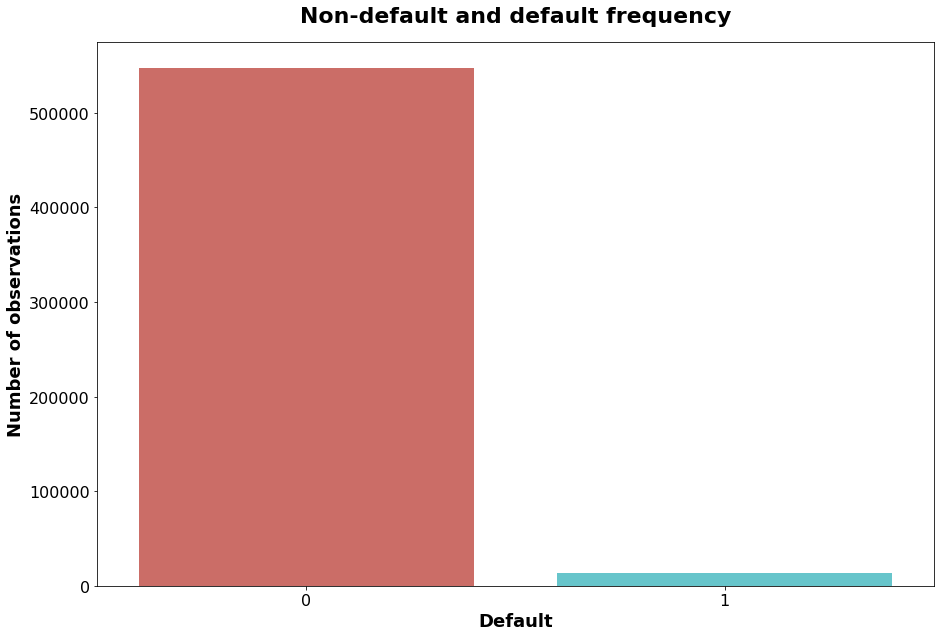

In [52]:
fig = plt.subplots(figsize=(15, 10))
sns.countplot(x="default_time", data=data_clean, palette='hls')
plt.title('Non-default and default frequency', fontsize=22, fontweight='bold', pad=20)
plt.xlabel('Default', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Number of observations', fontsize=18, fontweight='bold')
plt.show()

In [53]:
# dataset has more non-default that default users

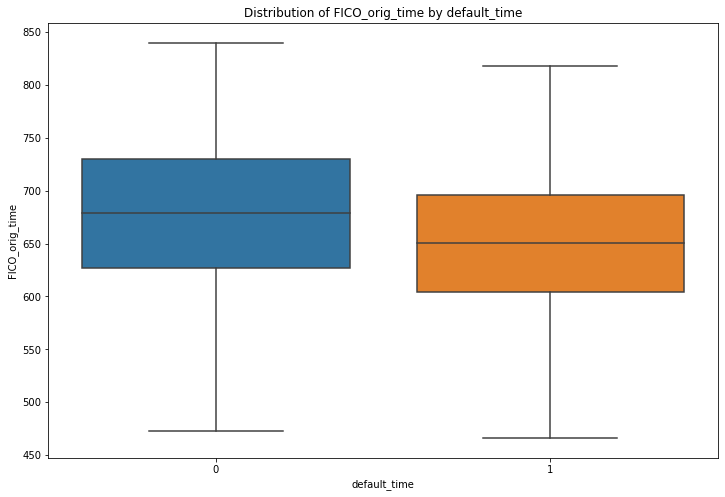

In [54]:
sns.reset_orig()
fig=plt.figure(figsize=(12, 8))
ax = sns.boxplot(x="default_time", y="FICO_orig_time", data=data_clean, showfliers = False)
ax.set_title('Distribution of FICO_orig_time by default_time')
plt.show()

In [55]:
# higher FICO correspond to a non-default, yes, it's ok, because score from 670 to 739 is a good scores

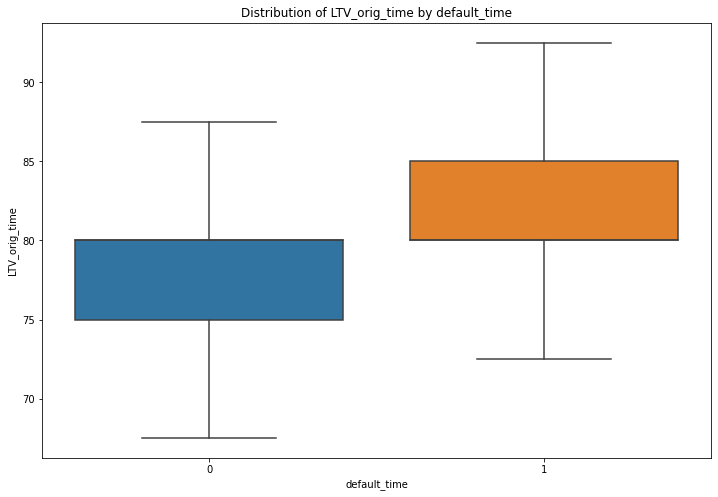

In [56]:
sns.reset_orig()
fig=plt.figure(figsize=(12, 8))
ax = sns.boxplot(x="default_time", y="LTV_orig_time", data=data_clean, showfliers = False)
ax.set_title('Distribution of LTV_orig_time by default_time')
plt.show()

In [57]:
# higher LTV correspond to a default, yes, it's ok, because it's more risky for a bank if they have a high LTV

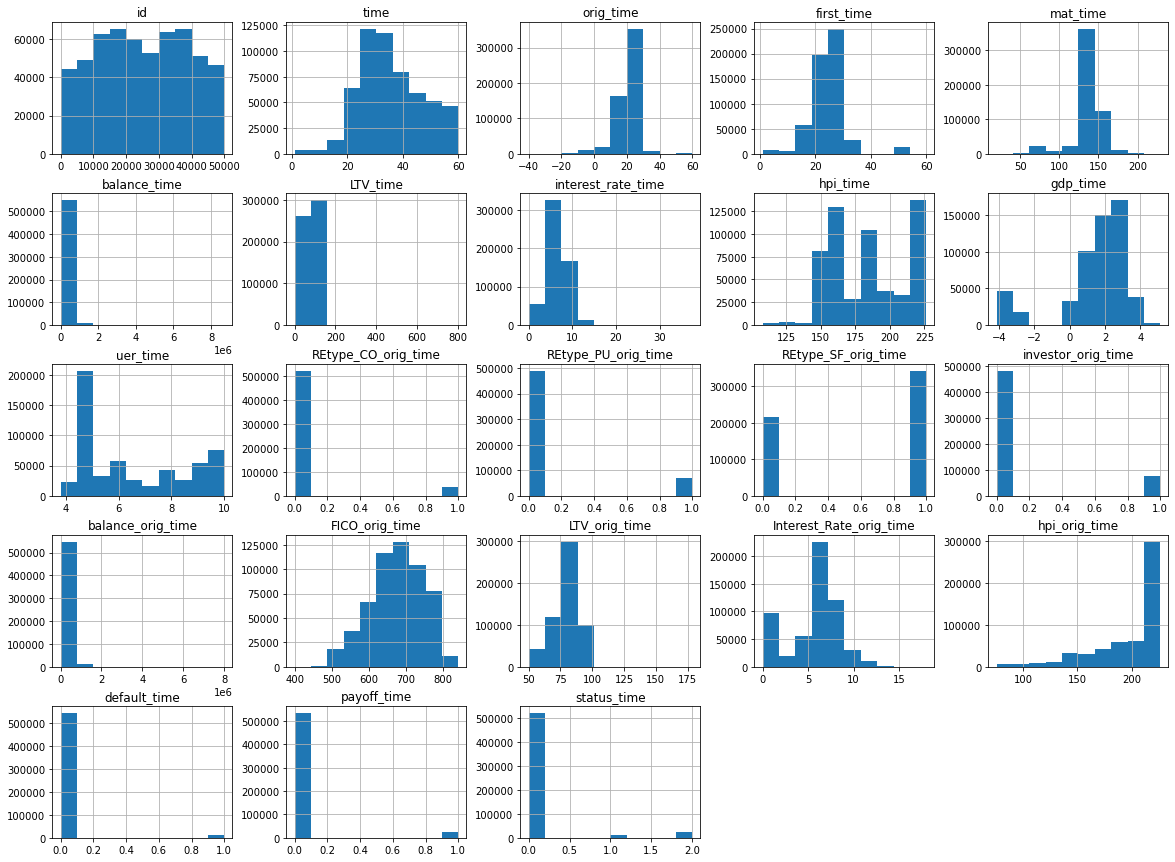

In [58]:
# Check the data distribution
data_clean.hist(figsize=(20,15))
plt.show()

In [59]:
# Sometimes we have a normal distribution

### Variable transformation

In [60]:
data_clean[:30]

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,sample
0,1,25,-7,25,113,41303.42,24.498,9.200,226.29,2.899,...,0,45000.0,715,69.4,9.20,87.03,0,0,0,public
1,1,26,-7,25,113,41061.95,24.484,9.200,225.10,2.151,...,0,45000.0,715,69.4,9.20,87.03,0,0,0,public
2,1,27,-7,25,113,40804.42,24.627,9.200,222.39,2.362,...,0,45000.0,715,69.4,9.20,87.03,0,0,0,public
3,1,28,-7,25,113,40483.89,24.736,9.200,219.67,1.229,...,0,45000.0,715,69.4,9.20,87.03,0,0,0,public
4,1,29,-7,25,113,40367.06,24.925,9.200,217.37,1.693,...,0,45000.0,715,69.4,9.20,87.03,0,0,0,public
5,1,30,-7,25,113,40127.97,25.318,9.200,212.73,2.274,...,0,45000.0,715,69.4,9.20,87.03,0,0,0,public
6,1,31,-7,25,113,39718.66,26.566,9.200,200.67,1.851,...,0,45000.0,715,69.4,9.20,87.03,0,0,0,public
7,1,32,-7,25,113,35877.03,25.873,9.200,186.12,1.104,...,0,45000.0,715,69.4,9.20,87.03,0,0,0,public
8,1,33,-7,25,113,34410.03,25.584,9.200,180.52,0.837,...,0,45000.0,715,69.4,9.20,87.03,0,0,0,public
9,1,34,-7,25,113,33590.47,26.008,9.200,173.35,-0.314,...,0,45000.0,715,69.4,9.20,87.03,0,0,0,public


In [61]:
data_clean['sample'].value_counts()

public    560715
Name: sample, dtype: int64

In [62]:
data_clean.columns

Index(['id', 'time', 'orig_time', 'first_time', 'mat_time', 'balance_time',
       'LTV_time', 'interest_rate_time', 'hpi_time', 'gdp_time', 'uer_time',
       'REtype_CO_orig_time', 'REtype_PU_orig_time', 'REtype_SF_orig_time',
       'investor_orig_time', 'balance_orig_time', 'FICO_orig_time',
       'LTV_orig_time', 'Interest_Rate_orig_time', 'hpi_orig_time',
       'default_time', 'payoff_time', 'status_time', 'sample'],
      dtype='object')

we should remove columns, that we don't want to use for our model

In [63]:
data_2 = data_clean.drop(['payoff_time', 'status_time', 'sample'], axis = 1)

In [64]:
data_2

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time
0,1,25,-7,25,113,41303.42,24.498,9.200,226.29,2.899,...,0,0,1,0,45000.0,715,69.4,9.20,87.03,0
1,1,26,-7,25,113,41061.95,24.484,9.200,225.10,2.151,...,0,0,1,0,45000.0,715,69.4,9.20,87.03,0
2,1,27,-7,25,113,40804.42,24.627,9.200,222.39,2.362,...,0,0,1,0,45000.0,715,69.4,9.20,87.03,0
3,1,28,-7,25,113,40483.89,24.736,9.200,219.67,1.229,...,0,0,1,0,45000.0,715,69.4,9.20,87.03,0
4,1,29,-7,25,113,40367.06,24.925,9.200,217.37,1.693,...,0,0,1,0,45000.0,715,69.4,9.20,87.03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560710,49999,56,17,52,177,265013.60,45.586,2.774,181.43,1.717,...,1,0,0,0,345000.0,779,60.0,1.75,179.45,0
560711,49999,57,17,52,177,263608.64,43.947,2.762,187.20,2.556,...,1,0,0,0,345000.0,779,60.0,1.75,179.45,0
560712,49999,58,17,52,177,262187.35,43.439,2.754,188.37,2.869,...,1,0,0,0,345000.0,779,60.0,1.75,179.45,0
560713,49999,59,17,52,177,260775.05,43.370,2.748,187.65,2.444,...,1,0,0,0,345000.0,779,60.0,1.75,179.45,0


In [65]:
data_2.iloc[3, :]

id                             1.000
time                          28.000
orig_time                     -7.000
first_time                    25.000
mat_time                     113.000
balance_time               40483.890
LTV_time                      24.736
interest_rate_time             9.200
hpi_time                     219.670
gdp_time                       1.229
uer_time                       4.600
REtype_CO_orig_time            0.000
REtype_PU_orig_time            0.000
REtype_SF_orig_time            1.000
investor_orig_time             0.000
balance_orig_time          45000.000
FICO_orig_time               715.000
LTV_orig_time                 69.400
Interest_Rate_orig_time        9.200
hpi_orig_time                 87.030
default_time                   0.000
Name: 3, dtype: float64

In [66]:
col_names = data_2.columns
col_names

Index(['id', 'time', 'orig_time', 'first_time', 'mat_time', 'balance_time',
       'LTV_time', 'interest_rate_time', 'hpi_time', 'gdp_time', 'uer_time',
       'REtype_CO_orig_time', 'REtype_PU_orig_time', 'REtype_SF_orig_time',
       'investor_orig_time', 'balance_orig_time', 'FICO_orig_time',
       'LTV_orig_time', 'Interest_Rate_orig_time', 'hpi_orig_time',
       'default_time'],
      dtype='object')

In [67]:
data_2.shape

(560715, 21)

creation of our target columns

In [68]:
data_2.iloc[0:27, :]

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time
0,1,25,-7,25,113,41303.42,24.498,9.20,226.29,2.899,...,0,0,1,0,45000.0,715,69.4,9.20,87.03,0
1,1,26,-7,25,113,41061.95,24.484,9.20,225.10,2.151,...,0,0,1,0,45000.0,715,69.4,9.20,87.03,0
2,1,27,-7,25,113,40804.42,24.627,9.20,222.39,2.362,...,0,0,1,0,45000.0,715,69.4,9.20,87.03,0
3,1,28,-7,25,113,40483.89,24.736,9.20,219.67,1.229,...,0,0,1,0,45000.0,715,69.4,9.20,87.03,0
4,1,29,-7,25,113,40367.06,24.925,9.20,217.37,1.693,...,0,0,1,0,45000.0,715,69.4,9.20,87.03,0
5,1,30,-7,25,113,40127.97,25.318,9.20,212.73,2.274,...,0,0,1,0,45000.0,715,69.4,9.20,87.03,0
6,1,31,-7,25,113,39718.66,26.566,9.20,200.67,1.851,...,0,0,1,0,45000.0,715,69.4,9.20,87.03,0
7,1,32,-7,25,113,35877.03,25.873,9.20,186.12,1.104,...,0,0,1,0,45000.0,715,69.4,9.20,87.03,0
8,1,33,-7,25,113,34410.03,25.584,9.20,180.52,0.837,...,0,0,1,0,45000.0,715,69.4,9.20,87.03,0
9,1,34,-7,25,113,33590.47,26.008,9.20,173.35,-0.314,...,0,0,1,0,45000.0,715,69.4,9.20,87.03,0


In [69]:
my_df = pd.DataFrame(columns=col_names)
my_df

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time


In [70]:
tmp_data_2 = data_2.copy()

In [71]:
len(tmp_data_2.index)

560715

In [72]:
tmp_data_2.tail(30)

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time
560685,49996,58,17,52,138,63765.03,53.263,3.250,188.37,2.869,...,0,0,0,1,82000.0,688,71.9,1.625,179.45,0
560686,49996,59,17,52,138,63200.83,52.995,3.250,187.65,2.444,...,0,0,0,1,82000.0,688,71.9,1.625,179.45,0
560687,49996,60,17,52,138,62630.97,51.917,3.250,189.82,2.836,...,0,0,0,1,82000.0,688,71.9,1.625,179.45,0
560688,49997,52,17,52,137,347558.19,87.595,2.750,161.13,1.081,...,0,0,0,0,331417.0,692,75.0,1.250,179.45,0
560689,49997,53,17,52,137,347558.19,81.505,2.875,173.17,0.893,...,0,0,0,0,331417.0,692,75.0,1.250,179.45,0
560690,49997,54,17,52,137,347558.19,78.426,2.875,179.97,1.507,...,0,0,0,0,331417.0,692,75.0,1.250,179.45,0
560691,49997,55,17,52,137,347558.19,78.382,2.750,180.07,2.422,...,0,0,0,0,331417.0,692,75.0,1.250,179.45,0
560692,49997,56,17,52,137,347558.19,77.794,2.750,181.43,1.717,...,0,0,0,0,331417.0,692,75.0,1.250,179.45,0
560693,49997,57,17,52,137,347558.19,75.397,2.750,187.20,2.556,...,0,0,0,0,331417.0,692,75.0,1.250,179.45,0
560694,49997,58,17,52,137,347558.19,74.928,2.750,188.37,2.869,...,0,0,0,0,331417.0,692,75.0,1.250,179.45,0


In [73]:
next_stop_index = None
id_prev = None
default_val = 0
for i in tmp_data_2.index:
    if i == next_stop_index:
        my_df = my_df.append(tmp_data_2.iloc[i])
        # inser a new value to default column
        my_df.loc[i,"default_time"] = max(tmp_data_2['default_time'][i], default_val)
        if len(tmp_data_2.index) > i + 12:        
            if tmp_data_2['id'][i + 12] == tmp_data_2['id'][i]:
                next_stop_index = i + 12
            else:
                next_stop_index = None
        
        default_val = 0
        continue
    if i == 0:
        my_df = my_df.append(tmp_data_2.iloc[i])
        # look if we have after 11 index the same id
        if tmp_data_2['id'][i + 11] == tmp_data_2['id'][i]:
            # save this index
            next_stop_index = i + 11
        id_prev = tmp_data_2['id'][i]
        continue
    # New id
    if id_prev != tmp_data_2['id'][i]:
        my_df = my_df.append(tmp_data_2.iloc[i])
        if len(tmp_data_2.index) > i + 11:
            if tmp_data_2['id'][i + 11] == tmp_data_2['id'][i]:
                next_stop_index = i + 11
            else:
                next_stop_index = None

        id_prev = tmp_data_2['id'][i]
    elif id_prev == tmp_data_2['id'][i] and next_stop_index != None:
        if tmp_data_2['default_time'][i] == 1:
            default_val = 1

In [74]:
my_df.head(10)

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time
0,1.0,25.0,-7.0,25.0,113.0,41303.42,24.498,9.200,226.29,2.899,...,0.0,0.0,1.0,0.0,45000.0,715.0,69.4,9.200,87.03,0.0
11,1.0,36.0,-7.0,25.0,113.0,32688.30,28.964,9.200,151.48,-3.517,...,0.0,0.0,1.0,0.0,45000.0,715.0,69.4,9.200,87.03,0.0
23,1.0,48.0,-7.0,25.0,113.0,29087.21,26.658,9.200,146.45,2.716,...,0.0,0.0,1.0,0.0,45000.0,715.0,69.4,9.200,87.03,1.0
24,2.0,25.0,18.0,25.0,138.0,105826.38,65.231,7.680,226.29,2.899,...,0.0,0.0,1.0,0.0,107200.0,558.0,80.0,7.680,186.91,0.0
26,4.0,25.0,-2.0,25.0,119.0,61031.10,33.911,10.500,226.29,2.899,...,0.0,0.0,1.0,0.0,63750.0,587.0,81.8,10.500,97.99,0.0
37,4.0,36.0,-2.0,25.0,119.0,59222.20,49.157,10.500,151.48,-3.517,...,0.0,0.0,1.0,0.0,63750.0,587.0,81.8,10.500,97.99,0.0
49,4.0,48.0,-2.0,25.0,119.0,56462.50,48.476,9.250,146.45,2.716,...,0.0,0.0,1.0,0.0,63750.0,587.0,81.8,10.500,97.99,0.0
61,5.0,25.0,18.0,25.0,138.0,52295.07,65.446,9.155,226.29,2.899,...,0.0,0.0,1.0,0.0,52800.0,527.0,80.0,9.155,186.91,0.0
64,6.0,25.0,19.0,25.0,139.0,209058.33,66.733,6.580,226.29,2.899,...,0.0,0.0,1.0,0.0,212000.0,670.0,80.0,6.580,191.42,0.0
75,6.0,36.0,19.0,25.0,139.0,204226.41,97.386,9.500,151.48,-3.517,...,0.0,0.0,1.0,0.0,212000.0,670.0,80.0,6.580,191.42,0.0


In [75]:
# del my_df

In [76]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72697 entries, 0 to 560706
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       72697 non-null  float64
 1   time                     72697 non-null  float64
 2   orig_time                72697 non-null  float64
 3   first_time               72697 non-null  float64
 4   mat_time                 72697 non-null  float64
 5   balance_time             72697 non-null  float64
 6   LTV_time                 72697 non-null  float64
 7   interest_rate_time       72697 non-null  float64
 8   hpi_time                 72697 non-null  float64
 9   gdp_time                 72697 non-null  float64
 10  uer_time                 72697 non-null  float64
 11  REtype_CO_orig_time      72697 non-null  float64
 12  REtype_PU_orig_time      72697 non-null  float64
 13  REtype_SF_orig_time      72697 non-null  float64
 14  investor_orig_time   

In [77]:
my_df['default_time'] = my_df['default_time'].apply(np.int64)
my_df['default_time']

0         0
11        0
23        1
24        0
26        0
         ..
560670    0
560679    0
560688    0
560697    0
560706    0
Name: default_time, Length: 72697, dtype: int64

In [78]:
my_df['time'] = my_df['time'].apply(np.int64)
my_df['id'] = my_df['id'].apply(np.int64)
my_df['orig_time'] = my_df['orig_time'].apply(np.int64)
my_df['first_time'] = my_df['first_time'].apply(np.int64)
my_df['mat_time'] = my_df['mat_time'].apply(np.int64)
my_df['REtype_CO_orig_time'] = my_df['REtype_CO_orig_time'].apply(np.int64)
my_df['REtype_PU_orig_time'] = my_df['REtype_PU_orig_time'].apply(np.int64)
my_df['REtype_SF_orig_time'] = my_df['REtype_SF_orig_time'].apply(np.int64)
my_df['investor_orig_time'] = my_df['investor_orig_time'].apply(np.int64)
my_df['FICO_orig_time'] = my_df['FICO_orig_time'].apply(np.int64)

In [79]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72697 entries, 0 to 560706
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       72697 non-null  int64  
 1   time                     72697 non-null  int64  
 2   orig_time                72697 non-null  int64  
 3   first_time               72697 non-null  int64  
 4   mat_time                 72697 non-null  int64  
 5   balance_time             72697 non-null  float64
 6   LTV_time                 72697 non-null  float64
 7   interest_rate_time       72697 non-null  float64
 8   hpi_time                 72697 non-null  float64
 9   gdp_time                 72697 non-null  float64
 10  uer_time                 72697 non-null  float64
 11  REtype_CO_orig_time      72697 non-null  int64  
 12  REtype_PU_orig_time      72697 non-null  int64  
 13  REtype_SF_orig_time      72697 non-null  int64  
 14  investor_orig_time   

In [80]:
my_df = my_df.reset_index(drop=True)

In [81]:
my_df.head(10)

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time
0,1,25,-7,25,113,41303.42,24.498,9.200,226.29,2.899,...,0,0,1,0,45000.0,715,69.4,9.200,87.03,0
1,1,36,-7,25,113,32688.30,28.964,9.200,151.48,-3.517,...,0,0,1,0,45000.0,715,69.4,9.200,87.03,0
2,1,48,-7,25,113,29087.21,26.658,9.200,146.45,2.716,...,0,0,1,0,45000.0,715,69.4,9.200,87.03,1
3,2,25,18,25,138,105826.38,65.231,7.680,226.29,2.899,...,0,0,1,0,107200.0,558,80.0,7.680,186.91,0
4,4,25,-2,25,119,61031.10,33.911,10.500,226.29,2.899,...,0,0,1,0,63750.0,587,81.8,10.500,97.99,0
5,4,36,-2,25,119,59222.20,49.157,10.500,151.48,-3.517,...,0,0,1,0,63750.0,587,81.8,10.500,97.99,0
6,4,48,-2,25,119,56462.50,48.476,9.250,146.45,2.716,...,0,0,1,0,63750.0,587,81.8,10.500,97.99,0
7,5,25,18,25,138,52295.07,65.446,9.155,226.29,2.899,...,0,0,1,0,52800.0,527,80.0,9.155,186.91,0
8,6,25,19,25,139,209058.33,66.733,6.580,226.29,2.899,...,0,0,1,0,212000.0,670,80.0,6.580,191.42,0
9,6,36,19,25,139,204226.41,97.386,9.500,151.48,-3.517,...,0,0,1,0,212000.0,670,80.0,6.580,191.42,0


In [82]:
len(my_df.columns)

21

### Correlation

In [83]:
data_corr = my_df.copy()
data_corr

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time
0,1,25,-7,25,113,41303.42,24.498,9.20,226.29,2.899,...,0,0,1,0,45000.0,715,69.4,9.200,87.03,0
1,1,36,-7,25,113,32688.30,28.964,9.20,151.48,-3.517,...,0,0,1,0,45000.0,715,69.4,9.200,87.03,0
2,1,48,-7,25,113,29087.21,26.658,9.20,146.45,2.716,...,0,0,1,0,45000.0,715,69.4,9.200,87.03,1
3,2,25,18,25,138,105826.38,65.231,7.68,226.29,2.899,...,0,0,1,0,107200.0,558,80.0,7.680,186.91,0
4,4,25,-2,25,119,61031.10,33.911,10.50,226.29,2.899,...,0,0,1,0,63750.0,587,81.8,10.500,97.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72692,49995,52,16,52,136,70931.27,62.600,3.25,161.13,1.081,...,1,0,0,1,81000.0,721,68.6,1.625,167.91,0
72693,49996,52,17,52,138,67229.76,65.651,3.25,161.13,1.081,...,0,0,0,1,82000.0,688,71.9,1.625,179.45,0
72694,49997,52,17,52,137,347558.19,87.595,2.75,161.13,1.081,...,0,0,0,0,331417.0,692,75.0,1.250,179.45,0
72695,49998,52,17,52,137,154505.10,91.082,3.00,161.13,1.081,...,0,0,0,0,166250.0,750,88.0,2.250,179.45,0


In [84]:
# We use Pearson method for correlation
c = data_corr.corr(method='pearson').abs()

In [85]:
c.isnull().sum().sum()

0

In [86]:
s = c.unstack()
res_corr = s.sort_values(kind='mergesort')

In [87]:
res_corr = res_corr.sort_values(ascending = False)

In [88]:
res_corr[0:40]

default_time             default_time               1.000000
uer_time                 uer_time                   1.000000
id                       id                         1.000000
time                     time                       1.000000
orig_time                orig_time                  1.000000
first_time               first_time                 1.000000
mat_time                 mat_time                   1.000000
balance_time             balance_time               1.000000
LTV_time                 LTV_time                   1.000000
interest_rate_time       interest_rate_time         1.000000
gdp_time                 gdp_time                   1.000000
hpi_time                 hpi_time                   1.000000
REtype_CO_orig_time      REtype_CO_orig_time        1.000000
REtype_PU_orig_time      REtype_PU_orig_time        1.000000
REtype_SF_orig_time      REtype_SF_orig_time        1.000000
investor_orig_time       investor_orig_time         1.000000
balance_orig_time       

We can see, that we have a high correlation between some variables; correlation >= 0.6 = is high.
So, we will remove highly correlated variables

- balance_time
- orig_time
- hpi_time
- time
- LTV_time

to remove

In [89]:
data_mod = my_df.copy()
data_mod.columns

Index(['id', 'time', 'orig_time', 'first_time', 'mat_time', 'balance_time',
       'LTV_time', 'interest_rate_time', 'hpi_time', 'gdp_time', 'uer_time',
       'REtype_CO_orig_time', 'REtype_PU_orig_time', 'REtype_SF_orig_time',
       'investor_orig_time', 'balance_orig_time', 'FICO_orig_time',
       'LTV_orig_time', 'Interest_Rate_orig_time', 'hpi_orig_time',
       'default_time'],
      dtype='object')

In [90]:
data_mod = data_mod.drop(['balance_time', 'orig_time', 'hpi_time', 'time', 'LTV_time'], axis=1)

In [91]:
data_mod.columns

Index(['id', 'first_time', 'mat_time', 'interest_rate_time', 'gdp_time',
       'uer_time', 'REtype_CO_orig_time', 'REtype_PU_orig_time',
       'REtype_SF_orig_time', 'investor_orig_time', 'balance_orig_time',
       'FICO_orig_time', 'LTV_orig_time', 'Interest_Rate_orig_time',
       'hpi_orig_time', 'default_time'],
      dtype='object')

In [92]:
data_mod.shape

(72697, 16)

In [93]:
data_mod.head(10)

,id,first_time,mat_time,interest_rate_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time
0,1,25,113,9.200,2.899,4.7,0,0,1,0,45000.0,715,69.4,9.200,87.03,0
1,1,25,113,9.200,-3.517,7.8,0,0,1,0,45000.0,715,69.4,9.200,87.03,0
2,1,25,113,9.200,2.716,8.3,0,0,1,0,45000.0,715,69.4,9.200,87.03,1
3,2,25,138,7.680,2.899,4.7,0,0,1,0,107200.0,558,80.0,7.680,186.91,0
4,4,25,119,10.500,2.899,4.7,0,0,1,0,63750.0,587,81.8,10.500,97.99,0
5,4,25,119,10.500,-3.517,7.8,0,0,1,0,63750.0,587,81.8,10.500,97.99,0
6,4,25,119,9.250,2.716,8.3,0,0,1,0,63750.0,587,81.8,10.500,97.99,0
7,5,25,138,9.155,2.899,4.7,0,0,1,0,52800.0,527,80.0,9.155,186.91,0
8,6,25,139,6.580,2.899,4.7,0,0,1,0,212000.0,670,80.0,6.580,191.42,0
9,6,25,139,9.500,-3.517,7.8,0,0,1,0,212000.0,670,80.0,6.580,191.42,0


In [94]:
data_mod.isnull().values.any()

False

### Modeling

In [95]:
data_mod = data_mod.drop(columns=['id'])

In [96]:
data_mod.columns

Index(['first_time', 'mat_time', 'interest_rate_time', 'gdp_time', 'uer_time',
       'REtype_CO_orig_time', 'REtype_PU_orig_time', 'REtype_SF_orig_time',
       'investor_orig_time', 'balance_orig_time', 'FICO_orig_time',
       'LTV_orig_time', 'Interest_Rate_orig_time', 'hpi_orig_time',
       'default_time'],
      dtype='object')

In [97]:
dt_s = sc.var_filter(data_mod, y="default_time")
dt_s

[INFO] filtering variables ...
Variable filtering on 72697 rows and 15 columns in 00:00:19 
4 variables are removed


,Interest_Rate_orig_time,uer_time,gdp_time,first_time,balance_orig_time,FICO_orig_time,interest_rate_time,hpi_orig_time,mat_time,LTV_orig_time,default_time
0,9.200,4.7,2.899,25,45000.0,715,9.20,87.03,113,69.4,0
1,9.200,7.8,-3.517,25,45000.0,715,9.20,87.03,113,69.4,0
2,9.200,8.3,2.716,25,45000.0,715,9.20,87.03,113,69.4,1
3,7.680,4.7,2.899,25,107200.0,558,7.68,186.91,138,80.0,0
4,10.500,4.7,2.899,25,63750.0,587,10.50,97.99,119,81.8,0
...,...,...,...,...,...,...,...,...,...,...,...
72692,1.625,8.0,1.081,52,81000.0,721,3.25,167.91,136,68.6,0
72693,1.625,8.0,1.081,52,82000.0,688,3.25,179.45,138,71.9,0
72694,1.250,8.0,1.081,52,331417.0,692,2.75,179.45,137,75.0,0
72695,2.250,8.0,1.081,52,166250.0,750,3.00,179.45,137,88.0,0


In [98]:
train, test = sc.split_df(dt_s, 'default_time').values()

In [99]:
print(dt_s.shape)
print(train.shape)
print(test.shape)

(72697, 11)
(50888, 11)
(21809, 11)


In [100]:
bins = sc.woebin(dt_s, y="default_time")

[INFO] creating woe binning ...
Binning on 72697 rows and 11 columns in 00:00:14


{'Interest_Rate_orig_time': <Figure size 432x288 with 2 Axes>,
 'uer_time': <Figure size 432x288 with 2 Axes>,
 'gdp_time': <Figure size 432x288 with 2 Axes>,
 'balance_orig_time': <Figure size 432x288 with 2 Axes>,
 'first_time': <Figure size 432x288 with 2 Axes>,
 'FICO_orig_time': <Figure size 432x288 with 2 Axes>,
 'interest_rate_time': <Figure size 432x288 with 2 Axes>,
 'hpi_orig_time': <Figure size 432x288 with 2 Axes>,
 'mat_time': <Figure size 432x288 with 2 Axes>,
 'LTV_orig_time': <Figure size 432x288 with 2 Axes>}

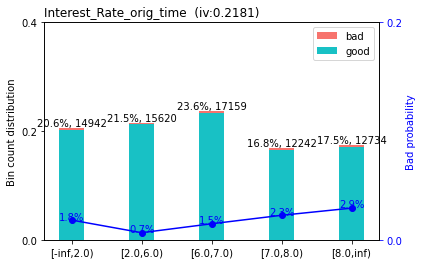

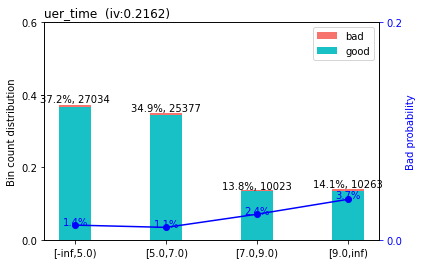

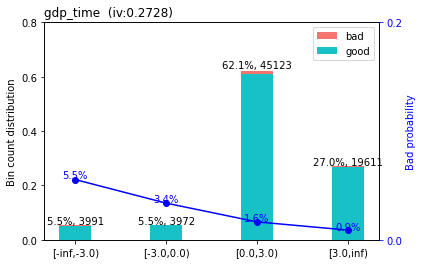

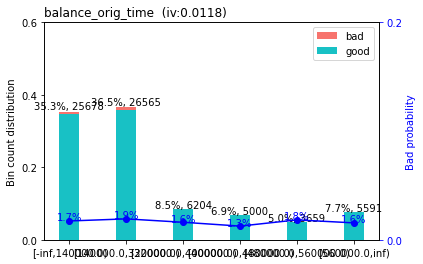

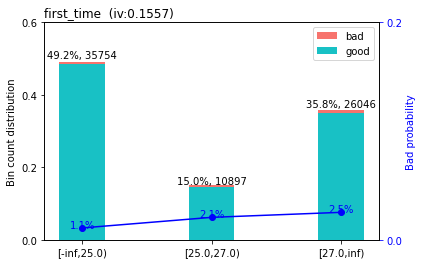

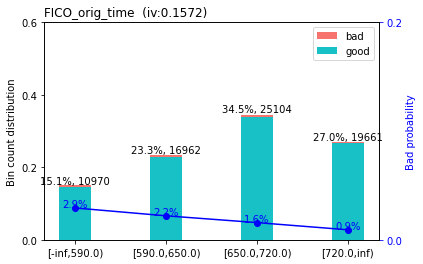

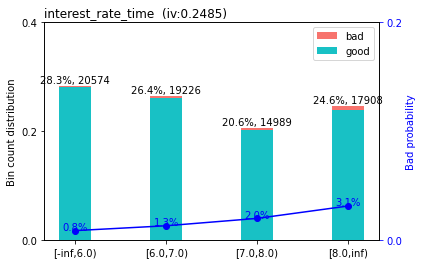

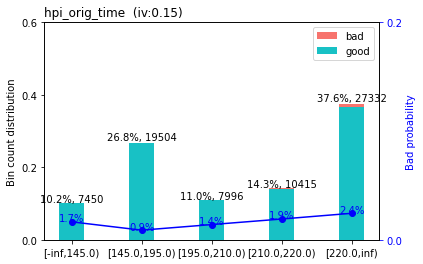

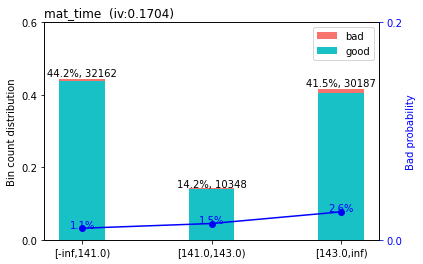

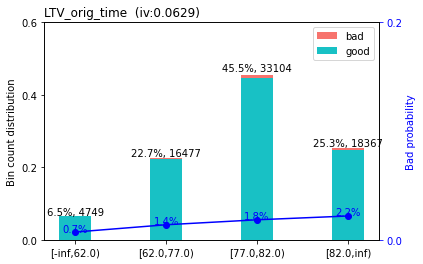

In [101]:
sc.woebin_plot(bins)

In [102]:
bins['balance_orig_time']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,balance_orig_time,"[-inf,140000.0)",25678,0.353220,25233,445,0.017330,-0.010576,0.000039,0.01184,140000.0,False
1,balance_orig_time,"[140000.0,320000.0)",26565,0.365421,26054,511,0.019236,0.095701,0.003506,0.01184,320000.0,False
2,balance_orig_time,"[320000.0,400000.0)",6204,0.085341,6104,100,0.016119,-0.084272,0.000582,0.01184,400000.0,False
3,balance_orig_time,"[400000.0,480000.0)",5000,0.068779,4937,63,0.012600,-0.334121,0.006560,0.01184,480000.0,False
4,balance_orig_time,"[480000.0,560000.0)",3659,0.050332,3592,67,0.018311,0.045486,0.000106,0.01184,560000.0,False
5,balance_orig_time,"[560000.0,inf)",5591,0.076908,5504,87,0.015561,-0.120065,0.001047,0.01184,inf,False


{'balance_orig_time': <Figure size 432x288 with 2 Axes>}

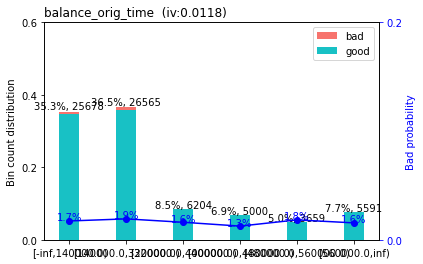

In [103]:
sc.woebin_plot(bins['balance_orig_time'])

#### binning adjustment

-------- 1/7 Interest_Rate_orig_time --------
>>> dt[Interest_Rate_orig_time].describe(): 
count    72697.000000
mean         5.542945
std          3.140498
min          0.000000
25%          4.500000
50%          6.375000
75%          7.500000
max         18.000000
Name: Interest_Rate_orig_time, dtype: float64 



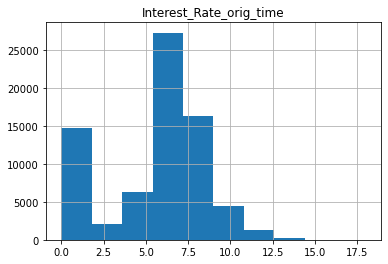

>>> Current breaks:
2.0,6.0,7.0,8.0 



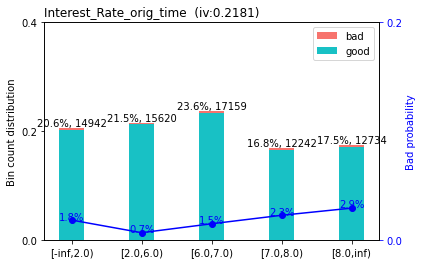

>>> Adjust breaks for (1/7) Interest_Rate_orig_time?
1: next 
2: yes 
3: back
Selection: 1
-------- 2/7 LTV_orig_time --------
>>> dt[LTV_orig_time].describe(): 
count    72697.000000
mean        79.233545
std         10.003591
min         50.100000
25%         75.000000
50%         80.000000
75%         82.600000
max        178.600000
Name: LTV_orig_time, dtype: float64 



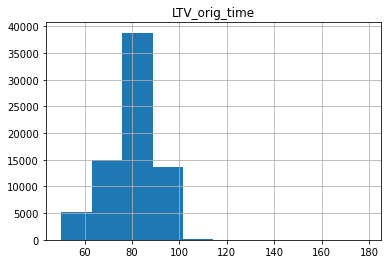

>>> Current breaks:
62.0,77.0,82.0 



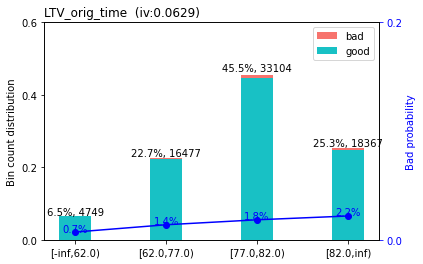

>>> Adjust breaks for (2/7) LTV_orig_time?
1: next 
2: yes 
3: back
Selection: 1
-------- 3/7 balance_orig_time --------
>>> dt[balance_orig_time].describe(): 
count    7.269700e+04
mean     2.551165e+05
std      2.143539e+05
min      6.246000e+03
25%      1.112000e+05
50%      1.912000e+05
75%      3.465000e+05
max      8.000000e+06
Name: balance_orig_time, dtype: float64 



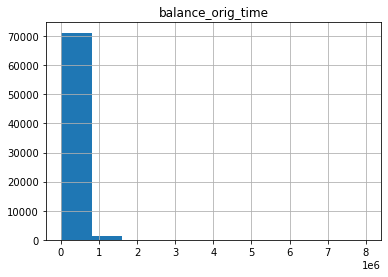

>>> Current breaks:
140000.0,320000.0,400000.0,480000.0,560000.0 



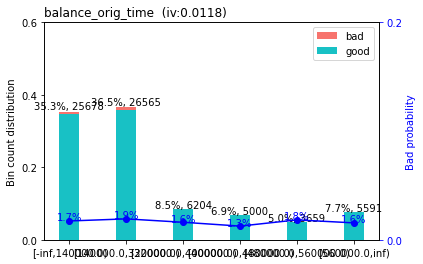

>>> Adjust breaks for (3/7) balance_orig_time?
1: next 
2: yes 
3: back
Selection: 1
-------- 4/7 gdp_time --------
>>> dt[gdp_time].describe(): 
count    72697.000000
mean         1.912148
std          1.781179
min         -4.147000
25%          1.269000
50%          2.362000
75%          3.069000
max          5.132000
Name: gdp_time, dtype: float64 



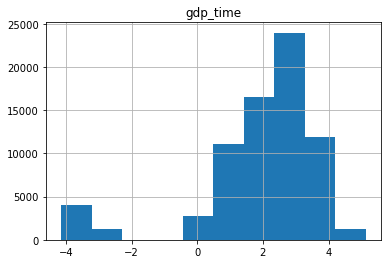

>>> Current breaks:
-3.0,0.0,3.0 



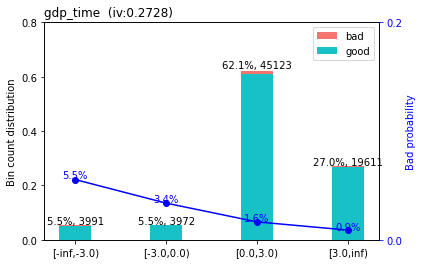

>>> Adjust breaks for (4/7) gdp_time?
1: next 
2: yes 
3: back
Selection: 1
-------- 5/7 hpi_orig_time --------
>>> dt[hpi_orig_time].describe(): 
count    72697.000000
mean       197.222401
std         34.151848
min         75.710000
25%        179.450000
50%        216.770000
75%        222.390000
max        226.290000
Name: hpi_orig_time, dtype: float64 



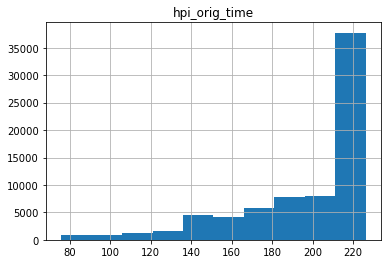

>>> Current breaks:
145.0,195.0,210.0,220.0 



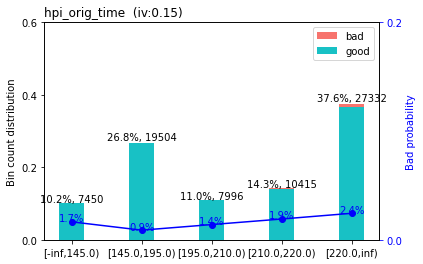

>>> Adjust breaks for (5/7) hpi_orig_time?
1: next 
2: yes 
3: back
Selection: 1
-------- 6/7 interest_rate_time --------
>>> dt[interest_rate_time].describe(): 
count    72697.000000
mean         6.900638
std          2.076364
min          0.000000
25%          5.875000
50%          6.850000
75%          7.990000
max         37.500000
Name: interest_rate_time, dtype: float64 



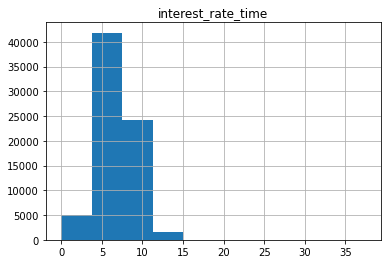

>>> Current breaks:
6.0,7.0,8.0 



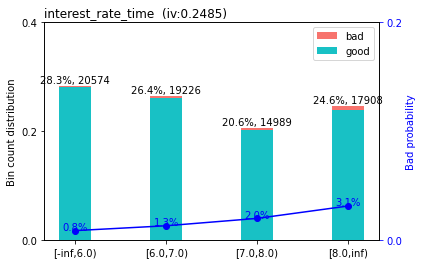

>>> Adjust breaks for (6/7) interest_rate_time?
1: next 
2: yes 
3: back
Selection: 1
-------- 7/7 uer_time --------
>>> dt[uer_time].describe(): 
count    72697.000000
mean         6.052731
std          1.805396
min          3.800000
25%          4.700000
50%          5.200000
75%          7.600000
max         10.000000
Name: uer_time, dtype: float64 



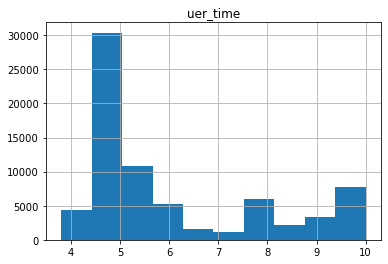

>>> Current breaks:
5.0,7.0,9.0 



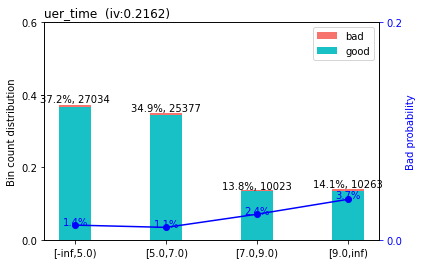

>>> Adjust breaks for (7/7) uer_time?
1: next 
2: yes 
3: back
Selection: 1


In [104]:
breaks_adj = sc.woebin_adj(dt_s, "default_time", bins)

In [105]:
bins_adj = sc.woebin(dt_s, y="default_time", breaks_list=breaks_adj)

[INFO] creating woe binning ...


In [106]:
train_woe = sc.woebin_ply(train, bins_adj)

[INFO] converting into woe values ...


In [107]:
test_woe = sc.woebin_ply(test, bins_adj)

[INFO] converting into woe values ...


In [108]:
y_train = train_woe.loc[:,'default_time']
X_train = train_woe.loc[:,train_woe.columns != 'default_time']
y_test = test_woe.loc[:,'default_time']
X_test = test_woe.loc[:,train_woe.columns != 'default_time']

In [109]:
X_train

,Interest_Rate_orig_time_woe,uer_time_woe,gdp_time_woe,balance_orig_time_woe,first_time_woe,FICO_orig_time_woe,interest_rate_time_woe,hpi_orig_time_woe,mat_time_woe,LTV_orig_time_woe
3,0.257834,-0.264102,-0.062591,-0.010576,0.167979,0.525477,0.119038,-0.688916,-0.505782,0.050234
5,0.520996,0.302279,1.190590,-0.010576,0.167979,0.525477,0.586563,-0.059879,-0.505782,0.050234
7,0.520996,-0.264102,-0.062591,-0.010576,0.167979,0.525477,0.586563,-0.688916,-0.505782,0.050234
8,-0.174777,-0.264102,-0.062591,0.095701,0.167979,-0.103648,-0.310349,-0.688916,-0.505782,0.050234
9,-0.174777,0.302279,1.190590,0.095701,0.167979,-0.103648,0.586563,-0.688916,-0.505782,0.050234
...,...,...,...,...,...,...,...,...,...,...
72688,-0.997525,0.302279,-0.062591,0.045486,0.374431,-0.651389,-0.736977,0.088852,-0.158774,0.050234
72692,0.035748,0.302279,-0.062591,-0.010576,0.374431,-0.651389,-0.736977,-0.688916,-0.505782,-0.239183
72693,0.035748,0.302279,-0.062591,-0.010576,0.374431,-0.103648,-0.736977,-0.688916,-0.505782,-0.239183
72694,0.035748,0.302279,-0.062591,-0.084272,0.374431,-0.103648,-0.736977,-0.688916,-0.505782,-0.239183


In [110]:
X_test

,Interest_Rate_orig_time_woe,uer_time_woe,gdp_time_woe,balance_orig_time_woe,first_time_woe,FICO_orig_time_woe,interest_rate_time_woe,hpi_orig_time_woe,mat_time_woe,LTV_orig_time_woe
0,0.520996,-0.264102,-0.062591,-0.010576,0.167979,-0.103648,0.586563,-0.059879,-0.505782,-0.239183
1,0.520996,0.302279,1.190590,-0.010576,0.167979,-0.103648,0.586563,-0.059879,-0.505782,-0.239183
2,0.520996,0.302279,-0.062591,-0.010576,0.167979,-0.103648,0.586563,-0.059879,-0.505782,-0.239183
4,0.520996,-0.264102,-0.062591,-0.010576,0.167979,0.525477,0.586563,-0.059879,-0.505782,0.050234
6,0.520996,0.302279,-0.062591,-0.010576,0.167979,0.525477,0.586563,-0.059879,-0.505782,0.050234
...,...,...,...,...,...,...,...,...,...,...
72687,-0.997525,0.302279,-0.062591,0.045486,0.374431,-0.651389,-0.736977,-0.226834,-0.158774,-0.239183
72689,-0.997525,0.302279,-0.062591,0.095701,0.374431,-0.651389,-0.736977,0.088852,-0.158774,0.050234
72690,0.035748,0.302279,-0.062591,-0.334121,0.374431,-0.103648,-0.736977,-0.688916,-0.505782,0.050234
72691,0.035748,0.302279,-0.062591,-0.084272,0.374431,-0.103648,-0.736977,-0.688916,-0.505782,-0.239183


#### Simple Logistic Regression

In [111]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
lr_simple = lr.fit(X_train, y_train)

In [113]:
lr_simple_train_pred = lr_simple.predict_proba(X_train)[:,1]
lr_simple_test_pred = lr_simple.predict_proba(X_test)[:,1]

In [114]:
lr_simple_test_pred

array([0.01363201, 0.04352324, 0.01966953, ..., 0.00795662, 0.00721694,
       0.00467455])

#### Logistic Regression with GridSearchCV

In [118]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV

lr_gs = LogisticRegression(random_state=0)
parameters = {
    'penalty': ['l1', 'l2'],
    'C': [10, 1],
    'solver': ['saga', 'newton-cg'],
    'class_weight': ['balanced', None],
    'max_iter': [100, 400]
}
log_grid = GridSearchCV(lr_gs, parameters, cv=3, n_jobs=-1)
log_grid_fit = log_grid.fit(X_train, y_train)

C:\Users\Alex\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.51607866        nan 0.61963279 0.66960777 0.63193868        nan
 0.6262428  0.66960777 0.98249096        nan 0.98249096 0.98249096
 0.98249096        nan 0.98249096 0.98249096 0.50167004        nan
 0.63298087 0.66966673 0.75357482        nan 0.5719219  0.66966673
 0.98249096        nan 0.98249096 0.98249096 0.98249096        nan
 0.98249096 0.98249096]
  warnings.warn(


In [119]:
print("Best score: ", log_grid.best_score_)
print("Best params: ", log_grid.best_params_)

Best score:  0.9824909605272726
Best params:  {'C': 10, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}


In [120]:
lr_gs_train_pred = log_grid_fit.predict_proba(X_train)[:,1]
lr_gs_test_pred = log_grid_fit.predict_proba(X_test)[:,1]

In [121]:
lr_gs_test_pred

array([0.01317744, 0.04237465, 0.01911789, ..., 0.00735683, 0.00682968,
       0.0044703 ])

Almost no difference between simple and GridSearch version

#### Random Forest

In [122]:
from sklearn.ensemble import RandomForestClassifier

rd = RandomForestClassifier(random_state=0, max_features = 'log2', criterion='entropy', n_estimators=200)
rd_fit = rd.fit(X_train, y_train)

In [123]:
rd_train_pred = rd_fit.predict_proba(X_train)[:,1]
rd_test_pred = rd_fit.predict_proba(X_test)[:,1]

In [124]:
rd_test_pred

array([0.005     , 0.        , 0.00571429, ..., 0.04      , 0.        ,
       0.015     ])

## Evaluation results

#### LG

C:\Users\Alex\anaconda3\lib\site-packages\scorecardpy\perf.py:318: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(subplot_nrows,subplot_ncols,i+1)
C:\Users\Alex\anaconda3\lib\site-packages\scorecardpy\perf.py:318: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(subplot_nrows,subplot_ncols,i+1)


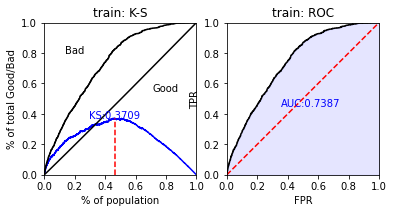

C:\Users\Alex\anaconda3\lib\site-packages\scorecardpy\perf.py:318: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(subplot_nrows,subplot_ncols,i+1)
C:\Users\Alex\anaconda3\lib\site-packages\scorecardpy\perf.py:318: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(subplot_nrows,subplot_ncols,i+1)


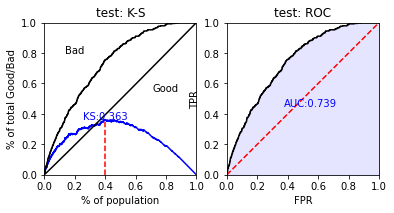

In [130]:
lg_train_perf = sc.perf_eva(y_train, lr_simple_train_pred, title = "train")
lg_test_perf = sc.perf_eva(y_test, lr_simple_test_pred, title = "test")

#### RD

C:\Users\Alex\anaconda3\lib\site-packages\scorecardpy\perf.py:318: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(subplot_nrows,subplot_ncols,i+1)
C:\Users\Alex\anaconda3\lib\site-packages\scorecardpy\perf.py:318: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(subplot_nrows,subplot_ncols,i+1)


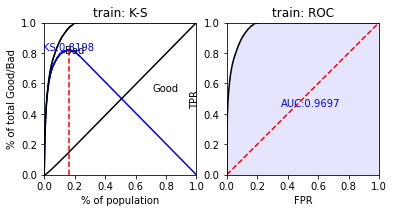

C:\Users\Alex\anaconda3\lib\site-packages\scorecardpy\perf.py:318: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(subplot_nrows,subplot_ncols,i+1)
C:\Users\Alex\anaconda3\lib\site-packages\scorecardpy\perf.py:318: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(subplot_nrows,subplot_ncols,i+1)


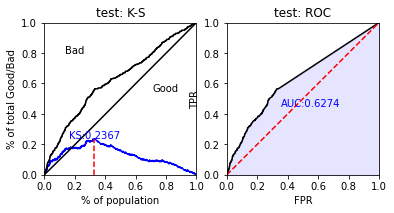

In [126]:
rd_train_perf = sc.perf_eva(y_train, rd_train_pred, title = "train")
rd_test_perf = sc.perf_eva(y_test, rd_test_pred, title = "test")

Kolmogorov-Smirnov - In simple words, it helps us to understand how well our predictive model is able to discriminate between events and non-events.

From results above, we can say, that LG had a better result compared with RD for testing sample. Also, there is a big difference between train and test RD's results - 0,96 and 0,63 for AUC, thus we can assume, that we had an overfitting problem. 

## Scorecard

In [131]:
card = sc.scorecard(bins_adj, lr_simple, X_train.columns)

In [132]:
train_score = sc.scorecard_ply(train, card, print_step=0)
test_score = sc.scorecard_ply(test, card, print_step=0)

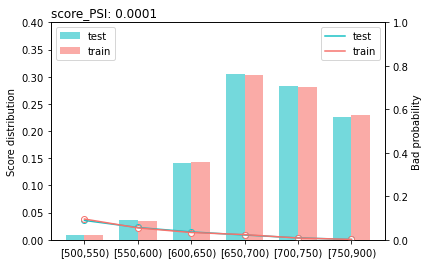

{'psi':   variable       PSI
 0    score  0.000121,
 'pic': {'score': <Figure size 432x288 with 2 Axes>}}

In [133]:
sc.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)

In [134]:
type(card)

dict

In [135]:
for key in card.keys():
    print(f'\n\n {card[key]}')



      variable  bin  points
0  basepoints  NaN     678


                   variable         bin  points
0  Interest_Rate_orig_time  [-inf,2.0)    -0.0
1  Interest_Rate_orig_time   [2.0,6.0)    10.0
2  Interest_Rate_orig_time   [6.0,7.0)     2.0
3  Interest_Rate_orig_time   [7.0,8.0)    -3.0
4  Interest_Rate_orig_time   [8.0,inf)    -5.0


    variable         bin  points
5  uer_time  [-inf,5.0)    13.0
6  uer_time   [5.0,7.0)    21.0
7  uer_time   [7.0,9.0)   -14.0
8  uer_time   [9.0,inf)   -37.0


     variable          bin  points
9   gdp_time  [-inf,-3.0)   -56.0
10  gdp_time   [-3.0,0.0)   -32.0
11  gdp_time    [0.0,3.0)     3.0
12  gdp_time    [3.0,inf)    32.0


              variable                  bin  points
13  balance_orig_time      [-inf,140000.0)     0.0
14  balance_orig_time  [140000.0,320000.0)    -3.0
15  balance_orig_time  [320000.0,400000.0)     2.0
16  balance_orig_time  [400000.0,480000.0)     9.0
17  balance_orig_time  [480000.0,560000.0)    -1.0
18  balance_o

In [136]:
card['hpi_orig_time']

,variable,bin,points
30,hpi_orig_time,"[-inf,145.0)",0.0
31,hpi_orig_time,"[145.0,195.0)",2.0
32,hpi_orig_time,"[195.0,210.0)",1.0
33,hpi_orig_time,"[210.0,220.0)",-0.0
34,hpi_orig_time,"[220.0,inf)",-1.0


#### Future improvements

- User can try to reduce number on bins
- Try other algorithms